In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
f = lambda r, rc: np.exp(-0.5*(r/rc)**2)

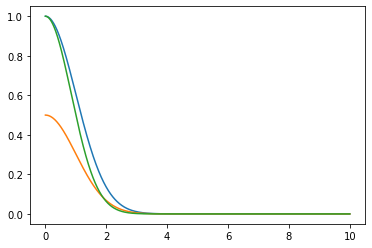

In [11]:
r = np.linspace(0, 10, 1000)
rc = 1
lam = 0.5
plt.plot(r, f(r, rc))
plt.plot(r, lam*f(r, rc))
plt.plot(r, f(r, lamprime))

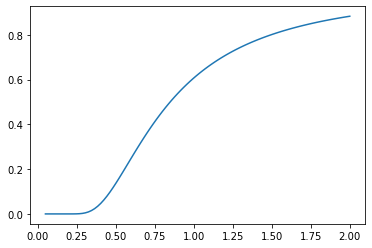

In [8]:
lamp = np.linspace(0.05, 2, 100)
plt.plot(lamp, np.exp(-0.5*1/lamp**2))

In [9]:
lamprime = np.sqrt(-1/(2*np.log(lam)))

In [10]:
lamprime

0.8493218002880191

In [13]:
from scipy.special import erf

In [28]:
def calculate_atomic_energies(density, nuclei, meshgrid, h_matrix, intg_method = 'sum'):
    """
    performs intgegration over electron density with minimum image convention

    density: the lambda averaged electron density
    nuclei: charge and coordinates of nuclei in compound
    meshgrid: rid which contains the coordinates for which the electron densities  are given
    h_matrix: H matrix with the cell vectors as columns
    return: the alchemical potentials and atomic energies of the compound if the input the lambda averaged density
    """
        
    # calculate atomic energies for every atom in compound
    atomic_energies_with_repulsion = np.empty(nuclei.shape[0])
    atomic_energies_with_repulsion = nuclear_repulsion(nuclei[:,0], nuclei[:, 1:4])
    
    atomic_energies = np.empty(nuclei.shape[0])
    alch_pots = np.empty(nuclei.shape[0])
    for idx, nuc in enumerate(nuclei):
        distance_nuc_grid = distance_MIC2(nuc[1:4], meshgrid, h_matrix) # calculate distance of gpts to nucleus with MIC
        Vloc = get_V_loc(distance_nuc_grid, pp_param)
        atomic_energies[idx] = -(density*Vloc).sum() # integrate over position of electron density

        alch_pots[idx] = alch_pot
        atomic_energies[idx] = nuc[0]*alch_pot
        atomic_energies_with_repulsion[idx] += atomic_energies[idx]
        
    
    return(atomic_energies_with_repulsion, atomic_energies, alch_pots)

# V_loc = lambda r, pp_param: -pp_param['Z_ion']/r*erf(r/(np.sqrt(2)*pp_param['r_loc'])) + np.exp(-0.5*(r/pp_param['r_loc'])**2)*(pp_param['c1']+pp_param['c2']*(r/pp_param['r_loc'])**2)

def get_V_loc(r, pp_param):
    """
    compute potential acting on the valence electrons
    """
    valence = -pp_param['Z_ion']/r*erf(r/(np.sqrt(2)*pp_param['r_loc']))
    core_corr = np.exp(-0.5*(r/pp_param['r_loc'])**2)*(pp_param['c1']+pp_param['c2']*(r/pp_param['r_loc'])**2)
    return(valence+core_corr)

In [17]:
import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/hitp/')
from cpmd_io import parse_pp_file

In [20]:
parse_pp_file('/data/sahre/PP_LIBRARY/O_GH_PBE')

{'Z_ion': 6.0, 'r_loc': 0.244554298, 'c_0': -16.6672148, 'c_1': 2.487311321}

NameError: name 'pp_param' is not defined